In [4]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("./scripts/")
from transition_motion_tensor import TransitionMotionTensor as TMT
import numpy as np
import matplotlib.pyplot as plt
from tmt_util import get_bin

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
def to_canvas(df, bin_size=30):
    bins = np.linspace(0, 1, bin_size+1)
    mat = df[["src_phase","dst_phase","outcomes","stability"]].values
    canvas = np.zeros(shape=(bin_size, bin_size))
    for item in mat:
        # Need to flip y-axis due to different coordinate system
        # - Canvas (0,0) starts from top left
        # - Phase (0,0) starts from bottom left
        r = (bin_size-1) - (get_bin(item[0], bins) % bin_size)
        c = get_bin(item[1], bins) % bin_size
        quality = item[2] * item[3]
        valid_num = (quality != np.inf) & (np.isnan(quality) == False)
        if valid_num:
            canvas[r,c] += quality          
    return canvas

## Transition Tensor (Dog)

* Included motions: `(Pace, Trot, Canter, Jump)`
* We provided collected transition samples, please visit `{TMT_ROOT}/TMT/data/cache/link.txt` to download

In [14]:
tensor_dog = TMT("dog_ptcj")
tensor_dog.load_from_cache(sample_cache_file='./data/cache/dog_transitions_ptcj_fixed-JSON-NTrajectory5000.pkl',
                           quality_cache_file='./data/cache/dog_transitions_ptcj_fixed-SCORE-w_time1.0-w_stability0.015-dt_stability0.01-NSample342197.pkl')

Found cache! Loading from ./data/cache/dog_transitions_ptcj_fixed-JSON-NTrajectory5000.pkl
Available motions: ['Pace', 'Trot', 'Canter', 'Jump']
Found cache! Loading from ./data/cache/dog_transitions_ptcj_fixed-SCORE-w_time1.0-w_stability0.015-dt_stability0.01-NSample342197.pkl


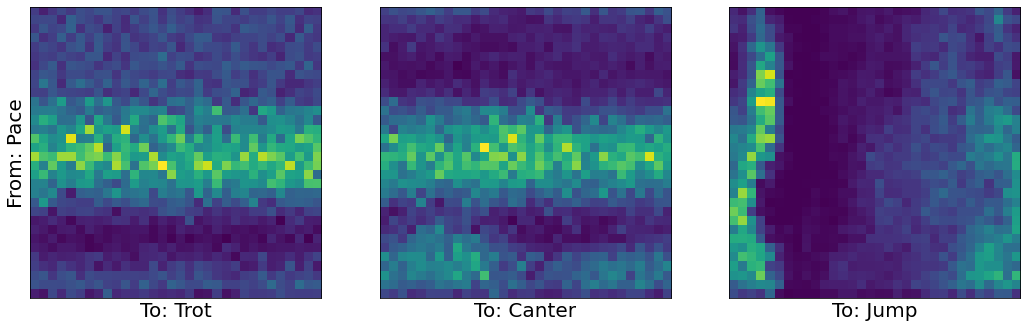

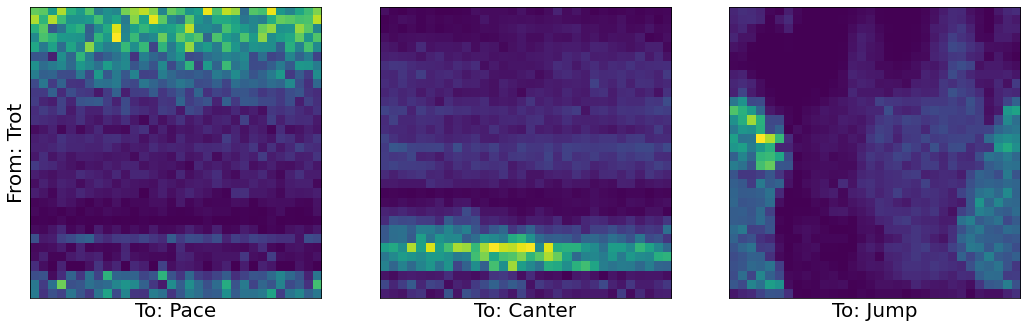

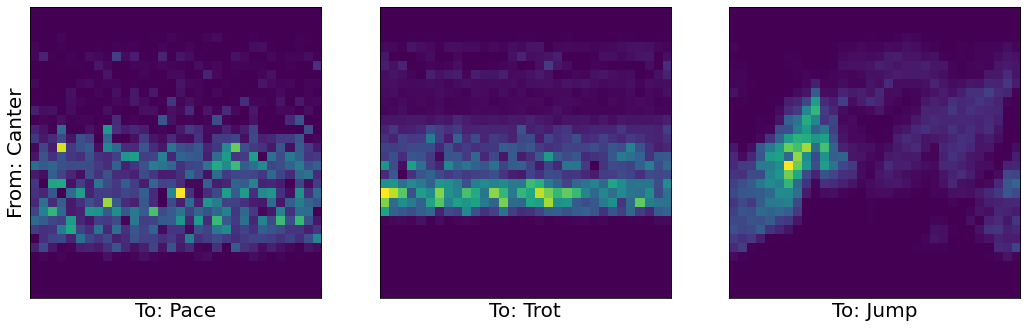

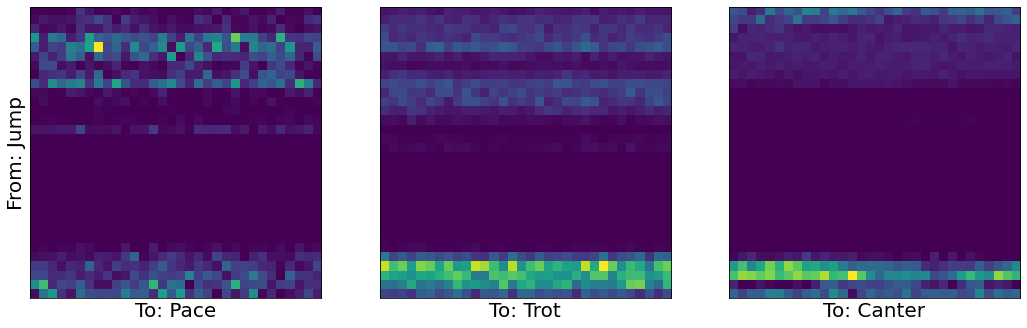

In [15]:
motions = ['Pace', 'Trot', 'Canter', 'Jump']
resolution = 32
pdf = tensor_dog._pdata.copy(deep=True)

plt.rcParams["figure.figsize"] = (24, 8)
for src_motion in motions:
    i = 1
    for dst_motion in motions:
        if src_motion == dst_motion: continue
        canvas = to_canvas(pdf[(pdf.src_motion == src_motion) & (pdf.dst_motion == dst_motion)],
                           bin_size=resolution)
        plt.subplot(1, len(motions), i)
        plt.imshow(canvas)
        plt.xticks([])
        plt.yticks([])
        if i == 1:
            plt.ylabel('From: ' + src_motion, fontsize=20)
        plt.xlabel('To: ' + dst_motion, fontsize=20)
        i += 1
    plt.show()

## Transition Tensor (Humanoid)

* Included motions: `(Walk, Jog, Run, Backflip)`
* We provided collected transition samples, please visit `{TMT_ROOT}/TMT/data/cache/link.txt` to download

In [12]:
tensor_humanoid = TMT("humanoid_wjrb")
tensor_humanoid.load_from_cache(sample_cache_file='./data/cache/humanoid_transitions_wjr_fixed-JSON-NTrajectory5000.pkl',
                                quality_cache_file='./data/cache/humanoid_transitions_wjr_fixed-SCORE-w_time1.0-w_stability0.015-dt_stability0.01-NSample480311.pkl')

Found cache! Loading from ./data/cache/humanoid_transitions_wjr_fixed-JSON-NTrajectory5000.pkl
Available motions: ['Walk', 'Jog', 'Run']
Found cache! Loading from ./data/cache/humanoid_transitions_wjr_fixed-SCORE-w_time1.0-w_stability0.015-dt_stability0.01-NSample480311.pkl


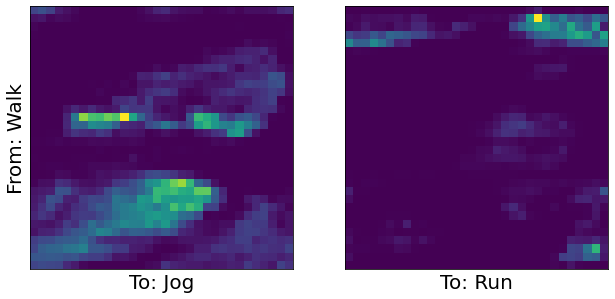

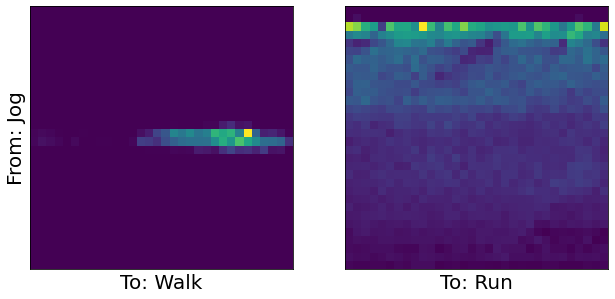

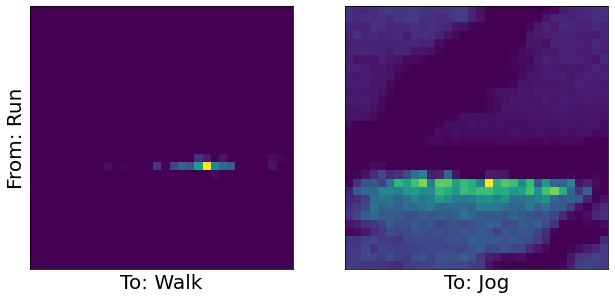

In [13]:
motions = ['Walk', 'Jog', 'Run']
resolution = 32
pdf = tensor_humanoid._pdata.copy(deep=True)

plt.rcParams["figure.figsize"] = (16, 8)
for src_motion in motions:
    i = 1
    for dst_motion in motions:
        if src_motion == dst_motion: continue
        canvas = to_canvas(pdf[(pdf.src_motion == src_motion) & (pdf.dst_motion == dst_motion)],
                           bin_size=resolution)
        plt.subplot(1, len(motions), i)
        plt.imshow(canvas)
        plt.xticks([])
        plt.yticks([])
        if i == 1:
            plt.ylabel('From: ' + src_motion, fontsize=20)
        plt.xlabel('To: ' + dst_motion, fontsize=20)       
        i += 1
    plt.show()